# Introduction

The dataset used include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records. The dataset source is UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder

# Data

The dataset is composed by the following features:

* **Gender**: gender of the individual.
* **Age**: age of the individual.
* **Height**: height of the individual.
* **Weight**: weight of the individual.
* **FamiliyHistoryWithOverweight**: Has a family member suffered or suffers from overweight?
* **FAVC**: Does the individual eat high caloric food frequently?
* **FCVC**: Does the individual usually eat vegetables in your meals?
* **NCP**: How many main meals does the individual have daily?
* **CAEC**: Does the individual eat any food between meals?
* **SMOKE**: Does the individual smoke?
* **CH20**: How much water does the individual drink daily?
* **SCC**: Does the individual monitor the calories eaten daily?
* **FAF**: 	How often the individual has physical activity?
* **TUE**: How much time does the individual use technological devices such as cell phone, videogames, television, computer and others?
* **CALC**: How often does the individual drink alcohol?
* **MTRANS**: Which transportation does the individual usually use?
* **NObeyesdad**: Obesity level

The 80% of the data (1688 records) will be used for training and validation, and the remaining 20% (423 records) for test.

In [2]:
# Read CSV file with the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## Dataset transformation

The dataset is divided in inputs and just one output:

* **Inputs**:
    * Gender
    * Age
    * Height
    * Weight
    * FamiliyHistoryWithOverweight
    * FAVC
    * FCVC
    * NCP
    * CAEC
    * SMOKE
    * CH20
    * SCC
    * FAF
    * TUE
    * CALC
    * MTRANS
* **Output**
    * NObeyesdad

The output NObeyesdad allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. As the predicted variable must be a real value (float or double) this value will be replaced by the corresponding BMI.

The Body Mass Index (BMI) is a simple calculation using a person's height and weight. The formula is (BMI = weight / height^2) (kg/m²). It is used as an indicator of whether an individual is underweight, normal weight, overweight, or obese. The correspondance from the previous categorical values to the new numerical ones are:

* **Insufficient Weight (Underweight)**: BMI less than 18.5
* **Normal Weight**: BMI between 18.5 and 24.9
* **Overweight Level I (Pre-obesity)**: BMI between 25 and 29.9
* **Overweight Level II**: BMI between 30 and 34.9
* **Obesity Type I**: BMI between 35 and 39.9
* **Obesity Type II**: BMI between 40 and 44.9
* **Obesity Type III**: BMI 45 and above

In [3]:
# Loop through each row and replace the column NObeyesdad value by the BMI correspondant value
for index, row in df.iterrows():
    df.at[index, 'NObeyesdad'] = round(df.at[index, 'Weight'] / (df.at[index, 'Height']**2), 2)

# Save the updated Dataset back to a CSV file 
df.to_csv('ObesityDataSet_raw_and_data_sinthetic_updated.csv', index=False)

# Update the read CSV file with the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic_updated.csv')

## Dataset checks

The data will be checked for the following points:

* Check for missing values
* Check for duplicates
* Check data type
* Check unique values on each column
* Check statistics

### Check missing values

No missing values found as there are no fields with a null value.

In [4]:
# Check missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Check duplicates

24 records are duplicated. This means that the dataset contains information about 24 individuals that have exactly the same features. In this case, this duplicates are kept because it is assumed that they represent legitimate repeated records from different people.

In [5]:
# Check duplicates
print(df.duplicated().sum())

24


### Check data types

Check data types allows to make a first sight to know which features are numerical and which are categorical. This will help in the further pre-processing steps to know which fields must be transformed/normalized. In this case the features are:

* **Gender**: Categorical.
* **Age**: Numerical.
* **Height**: Numerical.
* **Weight**: Numerical.
* **FamiliyHistoryWithOverweight**: Categorical.
* **FAVC**: Categorical.
* **FCVC**: Numerical.
* **NCP**: Numerical.
* **CAEC**: Categorical.
* **SMOKE**: Categorical.
* **CH2O**: Numerical.
* **SCC**: Categorical.
* **FAF**: 	Numerical.
* **TUE**: Numerical.
* **CALC**: Categorical.
* **MTRANS**: Categorical.
* **NObeyesdad**: Numerical.

In [6]:
#Check datatypes
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                        float64
dtype: object

### Check unique values on each column

Understanding the range of unique values in categorical variables will help in choosing the right encoding techniques.

In [7]:
# Check the number of unique values on each column
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                        1340
dtype: int64

### Check statistics

In [8]:
#Check statistics of data set
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700137
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011354
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.720000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.015000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.810000


To know more insights of the dataset, the features are separated in two different groups: Categorical and Numerical. From the previous analysis it is known which feature corresponds to each group.

* **Categorical**: Gender, FamiliyHistoryWithOverweigth, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS
* **Numerical**: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, NObeyesdad

In [9]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for feature in categorical_features:
    print(f"Category in {feature} is : {df[feature].unique()}")

Category in Gender is : ['Female' 'Male']
Category in family_history_with_overweight is : ['yes' 'no']
Category in FAVC is : ['no' 'yes']
Category in CAEC is : ['Sometimes' 'Frequently' 'Always' 'no']
Category in SMOKE is : ['no' 'yes']
Category in SCC is : ['no' 'yes']
Category in CALC is : ['no' 'Sometimes' 'Frequently' 'Always']
Category in MTRANS is : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


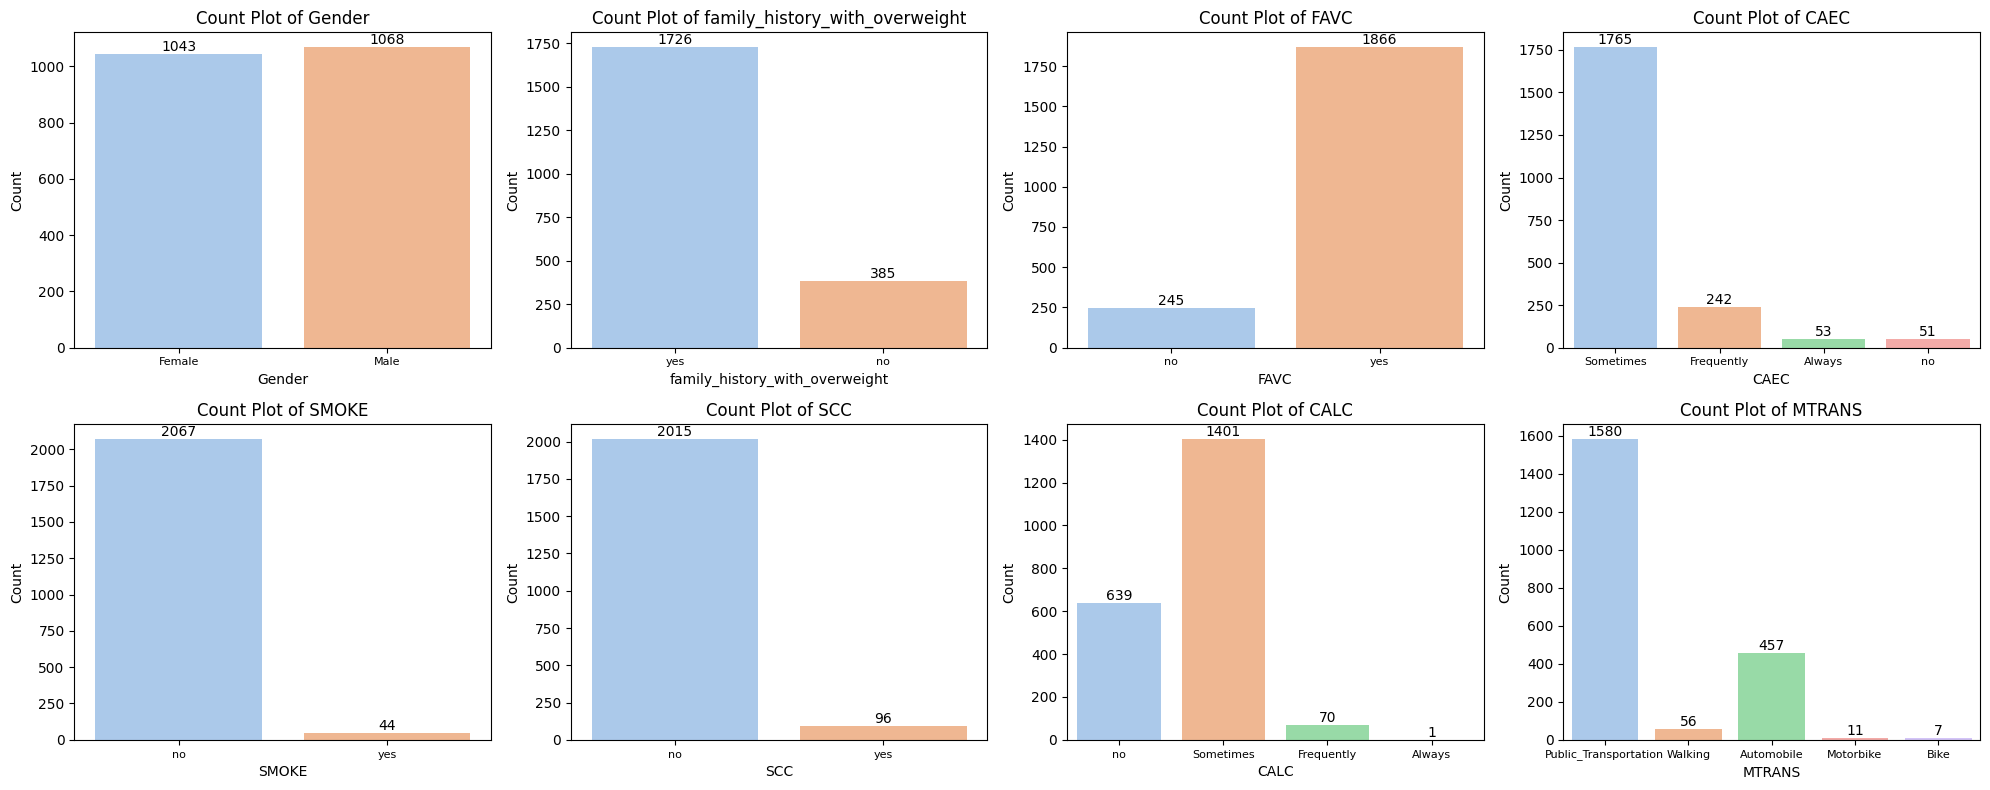

In [10]:
# Distribution of Categorical Features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axes = axes.ravel()
for idx, feature in enumerate(categorical_features):
    sns.countplot(x=df[feature], data=df, ax=axes[idx], palette='pastel', hue=feature, legend=False)
    for container in axes[idx].containers:
        axes[idx].bar_label(container, color='black', size=10)
    axes[idx].set_title('Count Plot of ' + str(feature))
    axes[idx].set_xlabel(feature)
    axes[idx].tick_params(axis='x', labelsize=8)
    axes[idx].set_ylabel('Count')
plt.tight_layout()
plt.show()

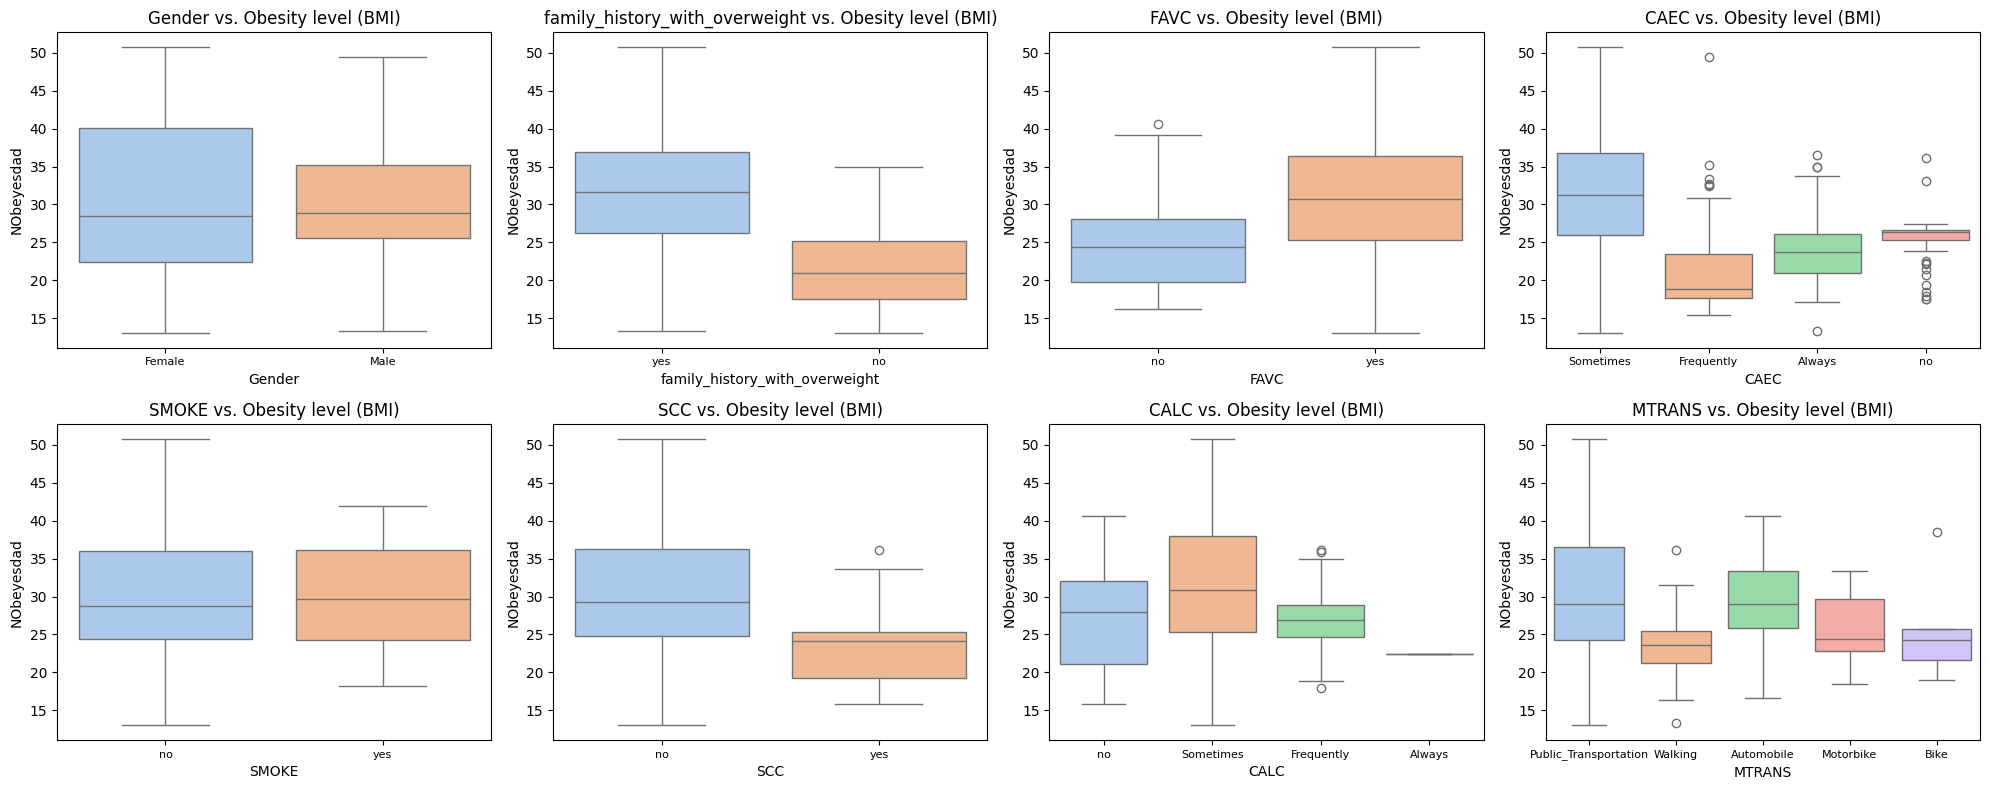

In [11]:
# Categorical Feature vs. Obesity level BMI
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(20, 8))
for idx, feature in enumerate(categorical_features):
    plt.subplot(2, 4, idx + 1)
    sns.boxplot(data=df, x=feature, y='NObeyesdad', palette='pastel', hue=feature, legend=False)
    plt.title(str(feature) + ' vs. Obesity level (BMI)')
    plt.tick_params(axis='x', labelsize=8)
plt.tight_layout()
plt.show()

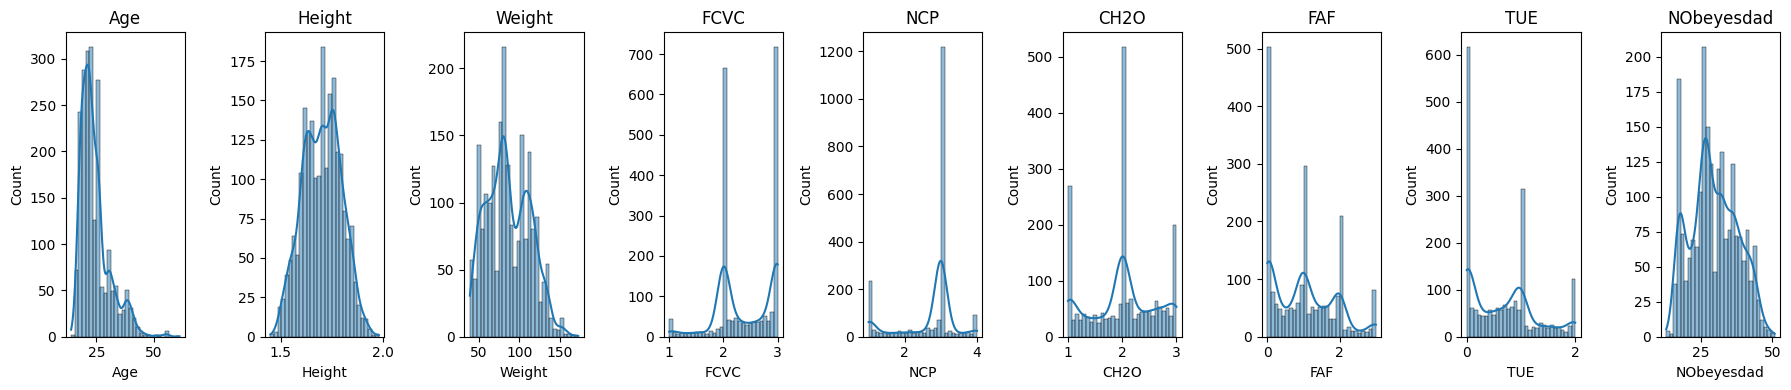

In [12]:
# Distribution of Numerical Features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']

plt.figure(figsize=(18, 4))
for idx, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), idx + 1)
    sns.histplot(data=df[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

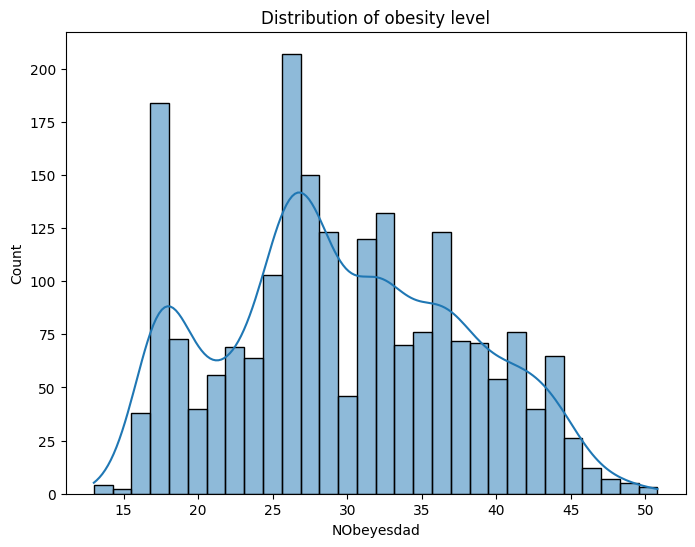

In [13]:
# Obesity level Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['NObeyesdad'], bins=30, kde=True)
plt.title('Distribution of obesity level')
plt.show()

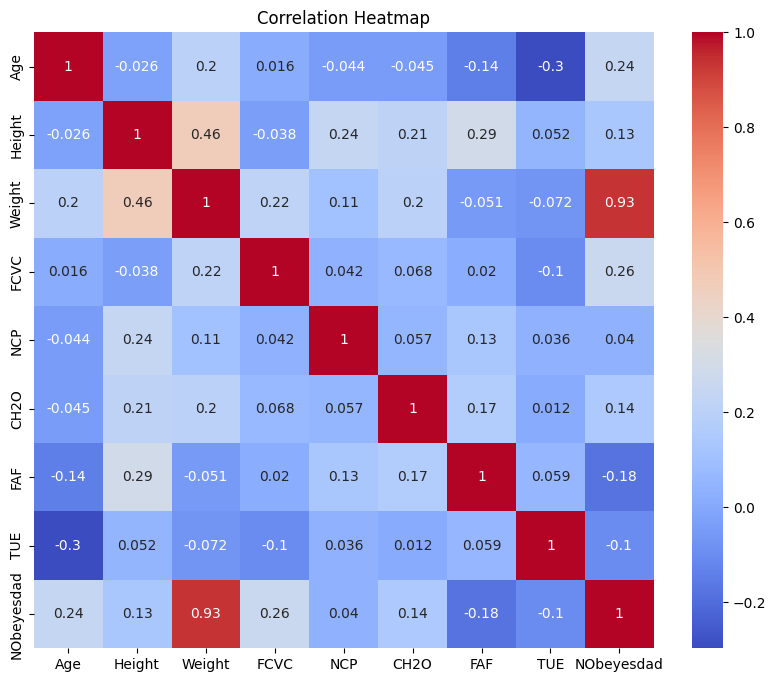

In [14]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Analysis results

1. **Dataset structure**
    1. It counts with 2111 records (rows) and 17 features (columns).
    3. The features of each record are considered unique even if some of them are duplicated as commented before.
    4. No null values found.
2. **Minimum and maximum values**
    1. The individuals height are in a range of [1.45, 1.98] m.
    2. The individuals weight are in a range of [39.0, 173.0] kg.
    3. The individuals ingest of vegetables are in a range [1, 3] pieces of vegetables per day.
    4. The individuals number of main meals are in a range [1, 4] main meals per day.
    5. The individuals drink water in a range [1, 3] l of water per day.
    6. The individuals practice sports in a range [0, 3] hours per day.
    7. The individuals uses technological devices in a range [0, 2] hours per day.
    8. The individuals have a BMI in a range of [13.0, 50.81] kg/m^2.
3. **Data distribution**
    1. The highest variability is found in the features: age, weight and obesity level.
    2. The averages are close to the percentile 50% showing an equally distributed data.
4. **Obesity level**
    1. Facts about numerical features:
        1. The individuals have a BMI in a range of [13.0, 50.81] kg/m^2.
        2. The average obesity level is 29.7 which corresponds to Overweight Level I close to the limit to Overweight Level II.
        3. The obesity level has a high variability.
        4. The 25% of the individuals are in the obesity level normal values (BMI<25).
        5. The highest impact in the obesity level is from the features (decreasing order of impact): Weight, FCVC, Age, CH20 and Height.
    2. Facts about categorical features:
        1. Males tends to have higher level of obesity.
        2. High caloric diets implies higher level of obesity.
        3. Smoking does not seem to have impact in the obesity level.
        4. Inidividuals who controls the calories consumed tends to have lower obesity levels.
        5. Individuals who uses transportation method like walking or bike tends to have lower obesity levels.


## Data preprocessing

The data is splitted in two different datasets, the training and test datasets. The training dataset contains the 16 input features stated before while the test data set only contains the output fetaure NObeyesdad=Obesity level. The datasets are created from the main dataset with 2111 records and it is splitted such 80% of the records (1688) are in the train set and the 20% remaining (423) are in the test set.

The following categorical features has been adjusted for integer values, this is suitable because the categorical features in the dataset have an inherent order (low, medium, high etc.) or the features are binary which can be converted from the 2 binary values to 0 and 1, which is a straightforward and effective change.

* **Gender**: Categorical.
* **FamiliyHistoryWithOverweight**: Categorical.
* **FAVC**: Categorical.
* **CAEC**: Categorical.
* **SMOKE**: Categorical.
* **SCC**: Categorical.
* **CALC**: Categorical.
* **MTRANS**: Categorical.

The following numerical values has been normalized. This is important to improve convergence speed and accuracy, preventing feature dominance and improving interpretability.

* **Age**: Numerical.
* **Height**: Numerical.
* **Weight**: Numerical.
* **FCVC**: Numerical.
* **NCP**: Numerical.
* **CH2O**: Numerical.
* **FAF**: 	Numerical.
* **TUE**: Numerical.
* **NObeyesdad**: Numerical.

In [15]:
# Categorical Features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
# Numerical Features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']

# Encoding categorical features to have integer values
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Scale numerical features to have a mean of 0 and a standard deviation of 1
scaler = MinMaxScaler() 
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save the updated Dataset back to a CSV file 
df.to_csv('ObesityDataSet_raw_and_data_sinthetic_processed.csv', index=False)

In [16]:
# Read CSV file with the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic_processed.csv')

# Separate the data into features and target
x, y = df.drop(['NObeyesdad'], axis=1), df[["NObeyesdad"]]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Load your data (example assumes pandas DataFrames)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = x_test.to_numpy()

# Scale data if needed
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())
y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min())

# Print the training and testing sets shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1688, 16) (1688, 1)
(423, 16) (423, 1)


# Imeplementation of BP

In [17]:
# Import Back-Propagation implementation module
import BP

In [41]:
# Initialize and train the neural network
nn = BP.NeuralNet(layers=[16, 4, 1], epochs=100000, learning_rate=0.001, momentum=0.001, fact='leaky_relu')
nn.fit(x_train, y_train)

# Test the network
predictions = nn.predict(x_test)

Epoch 0, Loss: 0.25461268372551815
Epoch 1000, Loss: 0.003866357210496108
Epoch 2000, Loss: 0.0020803559831428764
Epoch 3000, Loss: 0.001824823092279429
Epoch 4000, Loss: 0.001735029245845189
Epoch 5000, Loss: 0.001684106703934604
Epoch 6000, Loss: 0.0016505282726784324
Epoch 7000, Loss: 0.0016236327257879175
Epoch 8000, Loss: 0.0016015069207231825
Epoch 9000, Loss: 0.0015807963816612239
Epoch 10000, Loss: 0.001559708679784126
Epoch 11000, Loss: 0.001537091408131602
Epoch 12000, Loss: 0.001512223680883963
Epoch 13000, Loss: 0.001484746548301159
Epoch 14000, Loss: 0.0014542881456402173
Epoch 15000, Loss: 0.001420691914168892
Epoch 16000, Loss: 0.001383694543453775
Epoch 17000, Loss: 0.0013430848782488936
Epoch 18000, Loss: 0.0013018604092834693
Epoch 19000, Loss: 0.001258862940205346
Epoch 20000, Loss: 0.0012148840179400343
Epoch 21000, Loss: 0.0011676227698966986
Epoch 22000, Loss: 0.0011189429183425979
Epoch 23000, Loss: 0.0010697613433738073
Epoch 24000, Loss: 0.0010209504689401496
E

In [31]:
# Specify the file path where you want to save the predictions
file_path = "predictions.txt"

# Write the predictions to the file
with open(file_path, "w") as f:
    f.write("Predictions:\n")
    # Loop through each prediction (if you want them to be formatted nicely)
    for idx, prediction in enumerate(predictions):
        f.write(f"Predicted: {prediction}, Actual: {y_test.to_numpy()[idx]}\n")

print(f"Predictions have been written to {file_path}")

Predictions have been written to predictions.txt
